In [5]:
import sys
import os
import numpy
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2

### Create your Model

In [6]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))
            
model = MichaelisMenten()

### This is a normal plot with a time origin at t = 0

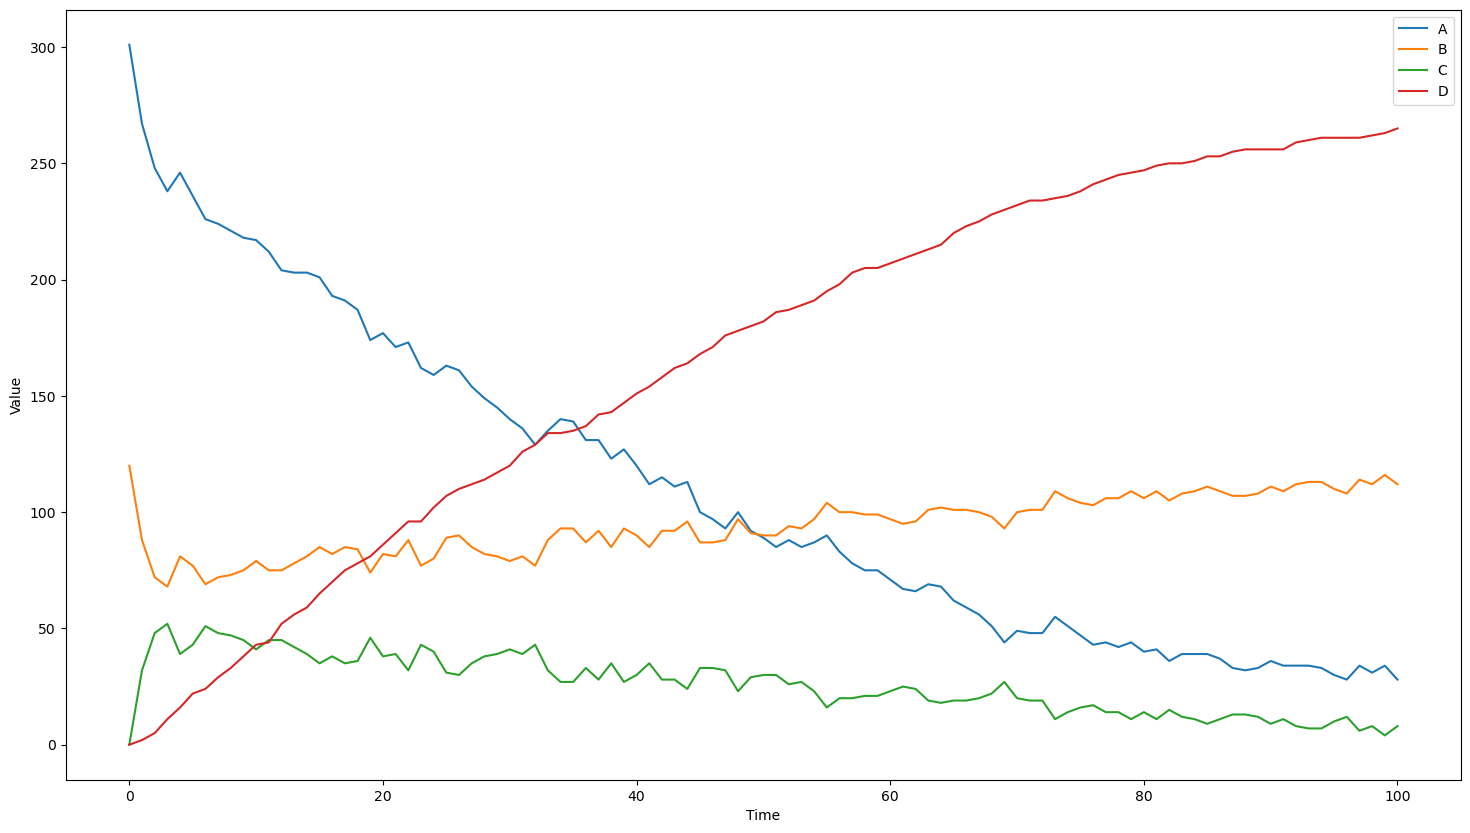

In [7]:
results = model.run()
results.plot()

### To plot this same information with a negative origin for time you have to modify the results object

### This is a plot with the time origin shifted to t = -50 
To do this you simply have to subtract or add the desired shift to the time sub array as seen below.

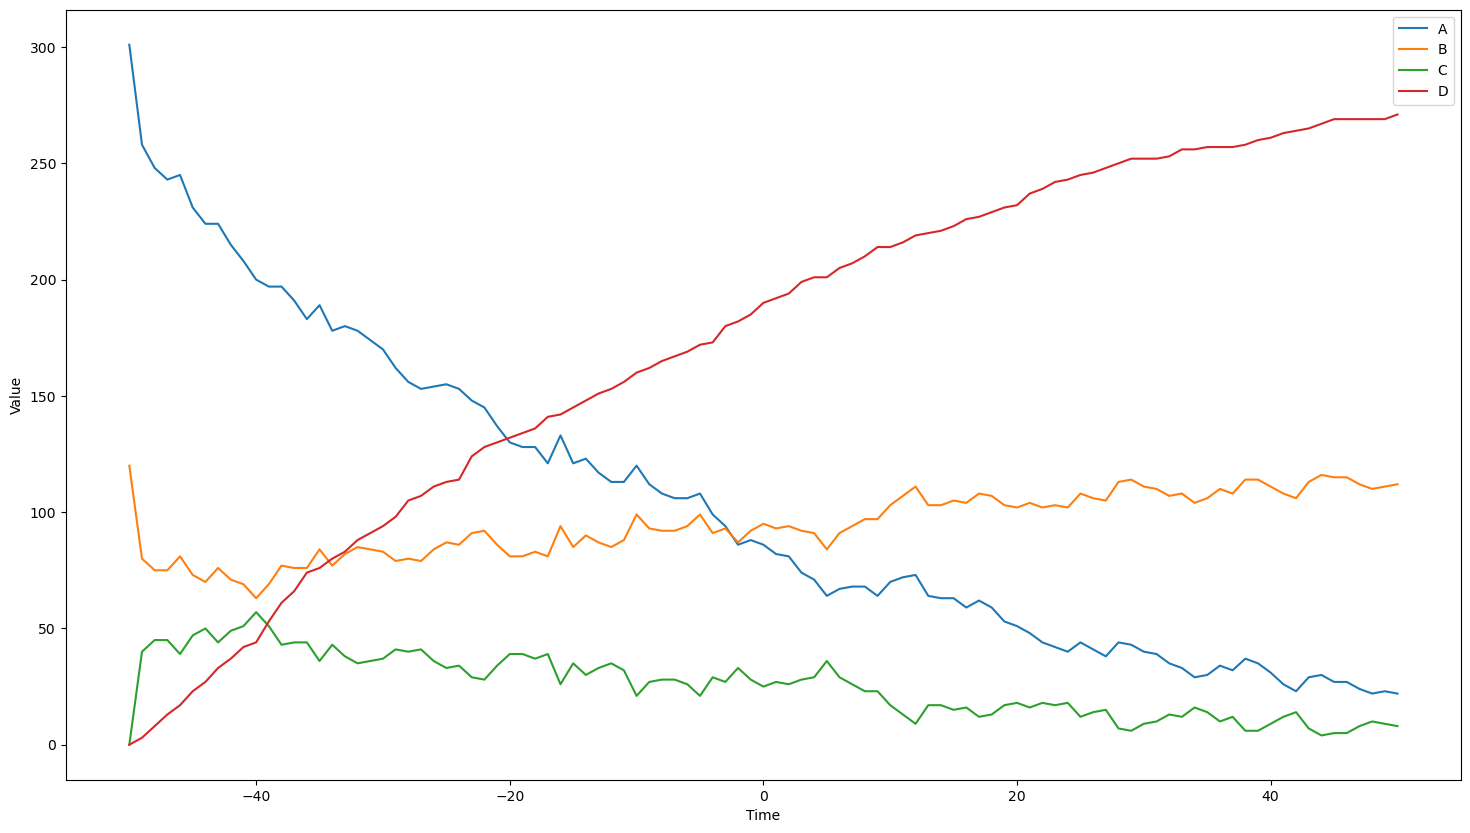

In [8]:
results2 = model.run()
results2[0]['time'] = results2[0]['time'] - 50
results2.plot()